In [42]:
# 1. 공정한 동전을 10번 던졌을 때, 정확히 6개의 앞면을 얻을 확률이 얼마나 되나요?

import scipy.stats as sp

# B(10, 1/2) ~ P(Y=6)
sp.binom.pmf(6, 10, 1/2)

0.2050781249999999

In [ ]:
# 2. A사는 전구를 생산하며 전구의 10%가 결함이 있다고 주장한다. 고객이 전구 6개를 구매할 경우, 전구 2개에 결함이 발생할 확률은 얼마입니까?



In [ ]:
# 3. 확률변수 X가 이항분포 n = 5, p = 0.6을 따른다고 한다. 확률변수 Y는 확률변수와 다음과 같은 관계를 가지고 있다. Y = 2X+3
#    확률변수의 Y의 기대값과 분산을 구하세요.


In [ ]:
# 4. 
# 슬통 회사에서는 이번에 출시한 새로운 촉매제의 효능을 검증하고 싶어한다. 신제품 촉
# 매재는 기존 공정에서 사용되는 화학반응 속도를 혁신적으로 줄여주는 기능이 탑재되어 있다고 한다.
#
# 회사 제품 검증 부서에서는 기존 공정의 화학 반응속도와 촉매제를 넣은 후의 반응속도를 측정하여 데이터를 만들었다.
#
# 1) 유의수준 5%하에서 신제품 촉매제가 기존의 화학 공정을 단축시킨다고 할 수 있는지에 대하여 검정하시오.
# 2) 촉매제로 인한 단축된 공정 시간에 대하여 90% 신뢰구간을 구하시오

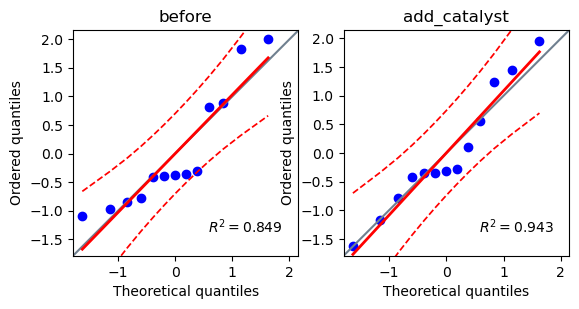

0.055792809241669516

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pingouin as pg

df4 = pd.read_csv("./data/chemical_performance.csv")

df4.groupby("Treat")["Time"].mean()
# Treat
# add_catalyst    1.165385
# before          1.530000
x = df4[df4["Treat"] == "before"]["Time"]
y = df4[df4["Treat"] == "add_catalyst"]["Time"]
x, len(x), len(y) # 13, 13

#
# (1) 정규성 검토
#
# before 그룹, add 그룹 모두 시작적으로는 정규성이 의심됨
plt.subplot(1,2,1)
plt.title("before")
pg.qqplot(x)
plt.subplot(1,2,2)
plt.title("add_catalyst")
pg.qqplot(y)
plt.show()
# shapiro-wilk 검정 통해 정확히 알아보겠음
# 각 그룹에 대한 귀무/대립 가설은
# - 귀무가설 : 정규성을 만족한다 , - 대립가설 : 정규성을 만족하지 않는다
# 검정 결과 before 그룹이 신뢰도 95%(유의수준 5%) 내에서 정규성을 만족하지 못함
sp.shapiro(x), sp.shapiro(y)
# ShapiroResult(statistic=0.8367363810539246, pvalue=0.01926259696483612)
# ShapiroResult(statistic=0.941055178642273, pvalue=0.4707110524177551)

#
# (2) 등분산성 검토
#
# 한 그룹이 정규성을 만족하지 못하니 lenven 검증하겠음
# 단, 정규성을 만족하지 못하니 평균 대신 중앙값에 대한 등분산성 검증하겠음 (비모수 검정 위해서)
# - 귀무 : 두 모집단의 분산이 동일함 , - 대립 : 두 모집단의 분산이 동일하지 않음
# → 검정 결과 유의확률이 0.247 로 유의수준 0.05 보다 커 귀무가설을 기각하지 못함
sp.levene(x, y, center="median")
# LeveneResult(statistic=1.404486168289024, pvalue=0.24757651251351717)

#
# (3) 검정 실행
# 
# wilcoxon signed-rank 검정 하겠음
# - 귀무가설 : add(y) 그룹의 중앙값이 before(x) 그룹보다 크거나 같음 (시간 단축 시키지 못함)
# - 대립가설 : add(y) 그룹의 중앙값이 before(x) 그룹보다 작음 (시간 단축 시킴)
# → p-value 가 0.047 로 유의수준보다 커 귀무가설을 기각함
# → 즉, 촉매제가 시간을 단축시켜 준다는 것은 신뢰도 95% 내에서 통계적으로 유의미 함
sp.wilcoxon(y,x,alternative="less")    # WilcoxonResult(statistic=70.0, pvalue=0.047119140625)

#
# (4) 단축된 공정시간에 대한 신뢰도 90% 의 신뢰구간 정보 추가
#

# 주어진 정보만을 가지고 신뢰구간을 어떻게 구함?
# 단지 알고 있는 것은 표본 평균 (단축 시간) 인데
# - ID 가 매칭되지 않는 상황에 표본을 13 개로 보고 그 표본 평균을 그룹의 평균으로 볼 수 있는가?
# - 볼 수 있다고 하면 자유도 12 인 t 분포상에서 구하면 되기는 함
# - 더우기 데이터가 정규성을 만족하지 않는데 t 분포에서 구하는것이 가능함?

# d_bar = x.mean() - y.mean()               # 0.36
# t = sp.t.ppf(q=0.1, df= (len(x) - 1))     # -1.3562173340231973
# a = d_bar + t * (x.std()/np.sqrt(len(x))) # 0.055792809241669516
# a
# (a, INF)

sp.wilcoxon()